<a href="https://colab.research.google.com/github/richasudindesai2021-stack/zara-sales-data-analysis/blob/main/zarasalesmore_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
marixe_zara_sales_for_eda_path = kagglehub.dataset_download('marixe/zara-sales-for-eda')

print('Data source import complete.')


100%|██████████| 932k/932k [00:00<00:00, 84.3MB/s]

Extracting files...
Data source import complete.


In [ ]:
# Imports and Settings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # using Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported, we switch backend
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print('Imports and settings completed.')

Imports and settings completed.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Zara_sales_EDA.csv to Zara_sales_EDA.csv


In [ ]:
from google.colab import files
import pandas as pd

# Re-upload the CSV
uploaded = files.upload()

# Load it with ; as the separator
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep=';')

# Check columns again
df.columns


Saving Zara_sales_EDA.csv to Zara_sales_EDA (3).csv


Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

In [ ]:
# Convert key numeric columns to numeric types
df['Sales Volume'] = pd.to_numeric(df['Sales Volume'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verify the data types
df[['Sales Volume', 'price']].dtypes


,0
Sales Volume,int64
price,float64


In [ ]:
# Make a vertical descriptive statistics table
vertical_table = desc_basic.T

# Style the table for clear screenshot use
styled_vertical = vertical_table.style.set_properties(**{'text-align': 'center'}) \
             .set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) \
             .format("{:.2f}")

styled_vertical


,Sales Volume,price
count,20252.00,20252.00
mean,1097.40,41.95
std,298.23,23.38
min,518.00,12.00
25%,849.00,23.95
50%,990.00,35.95
75%,1364.25,53.95
max,1940.00,134.99
median,990.00,35.95
mode,848.00,19.99


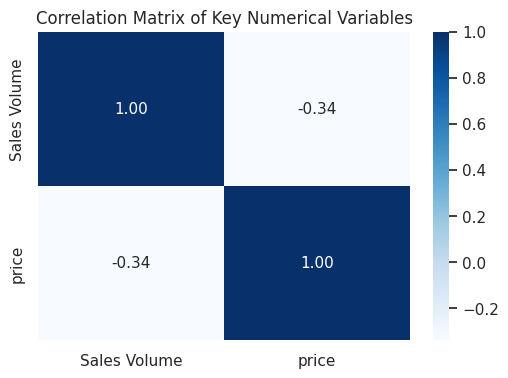

,Sales Volume,price
Sales Volume,1.00000,-0.33778
price,-0.33778,1.00000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for main numerical variables
corr = df[['Sales Volume', 'price']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Key Numerical Variables")
plt.show()

corr


In [ ]:
df['material'].value_counts()


,count
material,
Cotton,3851
Wool,3805
Wool Blend,3373
Polyester,2775
Linen,2573
Denim,1027
Viscose,990
Acrylic,881
Linen Blend,807


In [ ]:
import statsmodels.formula.api as smf

# Simple regression: effect of price and material with interaction
model_simple = smf.ols('Q("Sales Volume") ~ price * C(material)', data=df).fit()

model_simple.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q("Sales Volume")   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        02:41:52   Log-Likelihood:            -1.4287e+05
No. Observations:               20252   AIC:                         2.858e+05
Df Residuals:                   20230   BIC:                         2.860e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1299.8990     19.652     66.147      0.000    1261.380    1338.418
C(material)[T.Cotton]              -27.4250     21.746     -1.261      0.207     -70.049      15.199
C(material)[T.Denim]               -76.4423     26.401     -2.895      0.004    -128.190     -24.695
C(material)[T.Linen]                -8.2863     22.661     -0.366      0.715     -52.703      36.130
C(material)[T.Linen Blend]          24.9149     27.923      0.892      0.372     -29.817      79.646
C(material)[T.Polyester]           -38.1971     22.576     -1.692      0.091     -82.448       6.054
C(material)[T.Satin]               -20.4443     56.621     -0.361      0.718    -131.425      90.537
C(material)[T.Silk]               -106.3235     98.535     -1.079      0.281    -299.460      86.813
C(material)[T.Viscose]             -29.1062     26.959     -1.080      0.280     -81.948      23.735
C(material)[T.Wool]                 -6.5006     21.726     -0.299      0.765     -49.084      36.083
C(material)[T.Wool Blend]          -22.7634     22.037     -1.033      0.302     -65.957      20.431
price                               -4.3508      0.415    -10.483      0.000      -5.164      -3.537
price:C(material)[T.Cotton]          0.0741      0.457      0.162      0.871      -0.822       0.971
price:C(material)[T.Denim]           0.5677      0.562      1.009      0.313      -0.535       1.670
price:C(material)[T.Linen]          -0.0031      0.474     -0.007      0.995      -0.932       0.925
price:C(material)[T.Linen Blend]    -0.4345      0.585     -0.742      0.458      -1.582       0.713
price:C(material)[T.Polyester]      -0.0880      0.477     -0.184      0.854      -1.024       0.848
price:C(material)[T.Satin]          -0.9060      1.303     -0.696      0.487      -3.459       1.647
price:C(material)[T.Silk]            1.4150      2.011      0.704      0.482      -2.526       5.356
price:C(material)[T.Viscose]        -0.1559      0.572     -0.272      0.785      -1.277       0.966
price:C(material)[T.Wool]           -0.0416      0.456     -0.091      0.927      -0.935       0.852
price:C(material)[T.Wool Blend]      0.2046      0.466      0.439      0.660      -0.708       1.118
==============================================================================
Omnibus:                     8045.236   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1627.271
Skew:                           0.435   Prob(JB):                         0.00
Kurtosis:                       1.917   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is corre

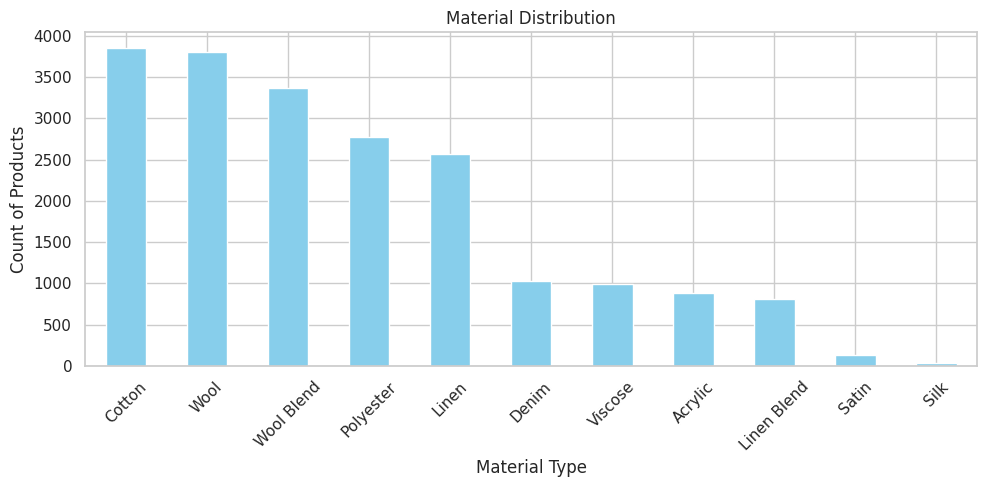

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['material'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Material Distribution")
plt.ylabel("Count of Products")
plt.xlabel("Material Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


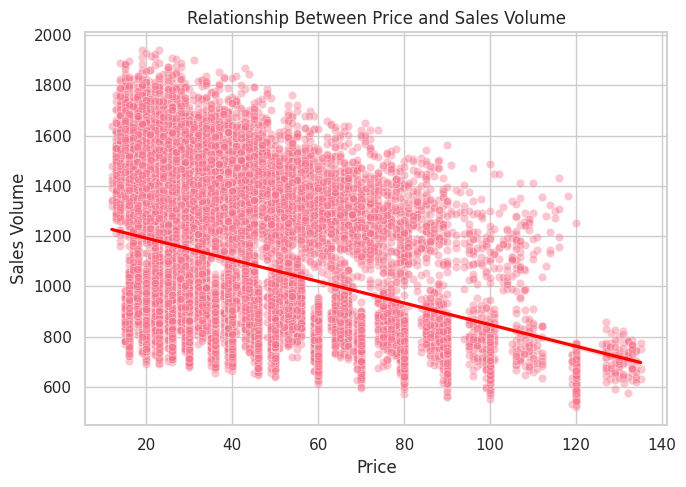

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='price', y='Sales Volume', alpha=0.4)
sns.regplot(data=df, x='price', y='Sales Volume', scatter=False, color='red')
plt.title("Relationship Between Price and Sales Volume")
plt.xlabel("Price")
plt.ylabel("Sales Volume")
plt.tight_layout()
plt.show()


In [ ]:
df.groupby('material')['price'].mean().sort_values(ascending=False)


,price
material,
Silk,43.292895
Linen,43.060688
Wool,42.772962
Cotton,42.379917
Linen Blend,41.705118
Acrylic,41.518774
Polyester,41.335874
Wool Blend,41.248346
Viscose,41.035859


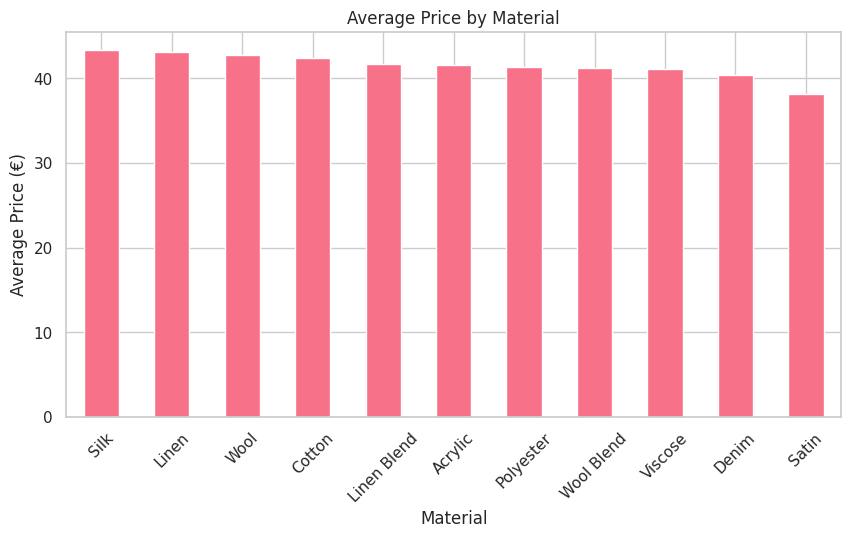

In [ ]:
df.groupby('material')['price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Average Price by Material")
plt.ylabel("Average Price (€)")
plt.xlabel("Material")
plt.xticks(rotation=45)
plt.show()


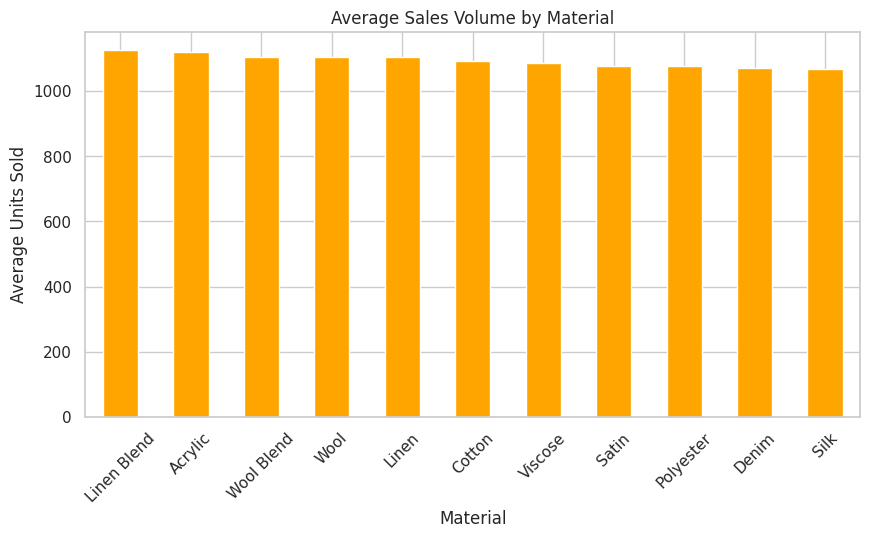

In [ ]:
df.groupby('material')['Sales Volume'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average Sales Volume by Material")
plt.ylabel("Average Units Sold")
plt.xlabel("Material")
plt.xticks(rotation=45)
plt.show()


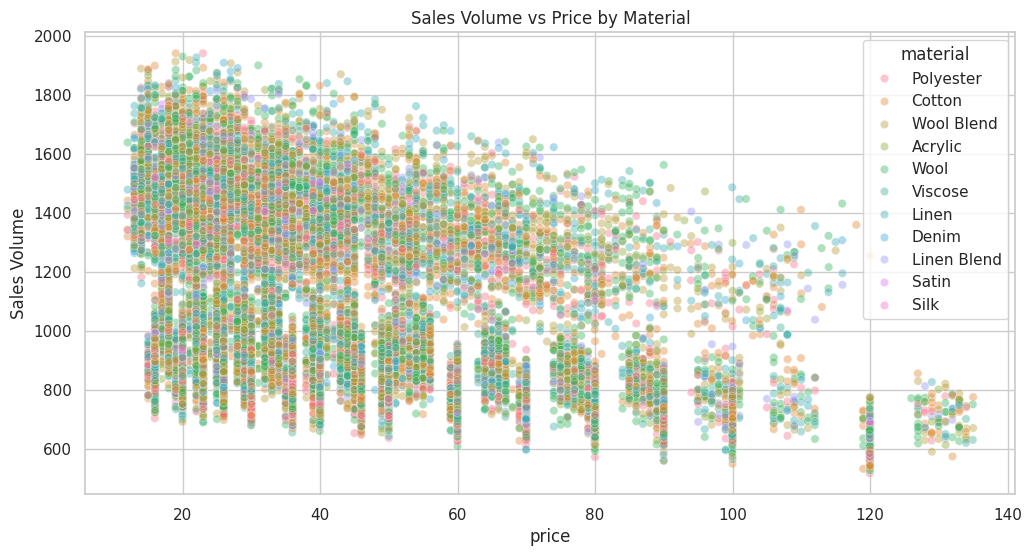

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='price', y='Sales Volume', hue='material', alpha=0.4)
plt.title("Sales Volume vs Price by Material")
plt.show()


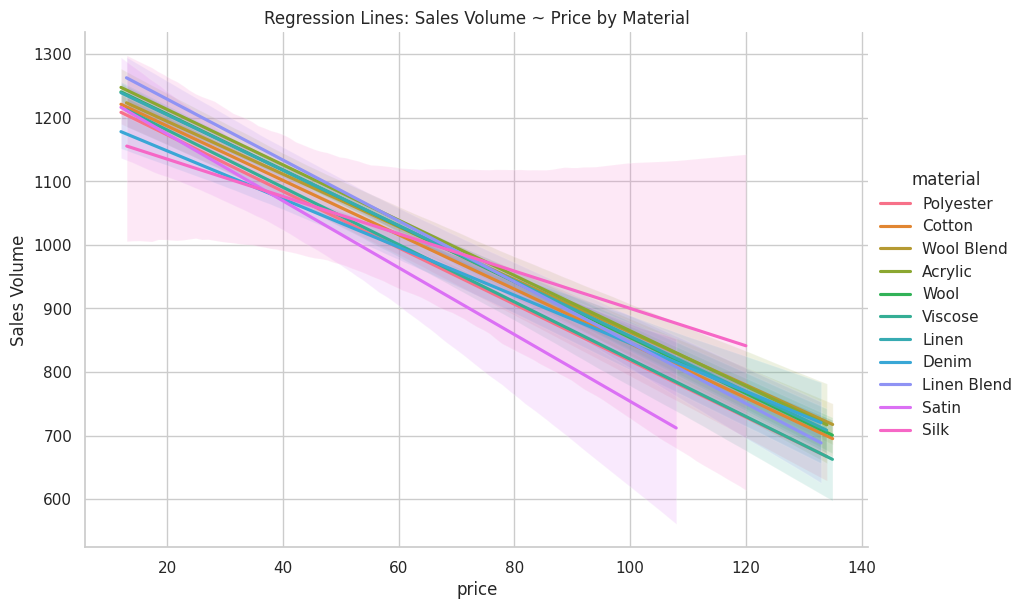

In [ ]:
sns.lmplot(data=df, x='price', y='Sales Volume', hue='material', height=6, aspect=1.5, scatter=False)
plt.title("Regression Lines: Sales Volume ~ Price by Material")
plt.show()


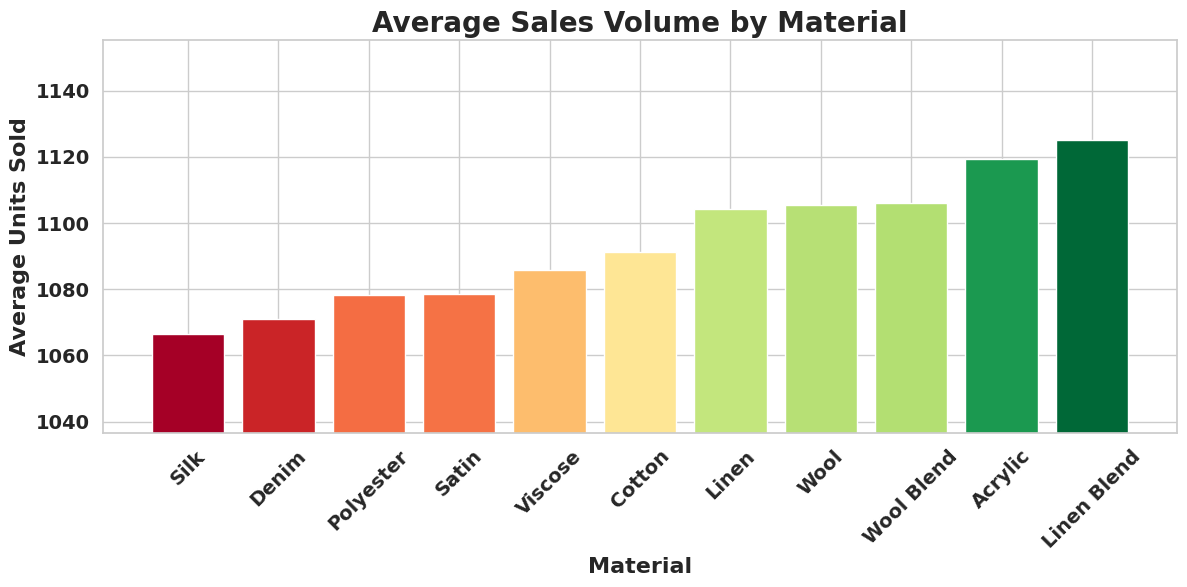

In [ ]:
plt.figure(figsize=(12,6))

# Plot gradient bars
plt.bar(sales_by_material.index, sales_by_material.values, color=colors)

# 🔤 Bigger & bolder fonts
plt.title("Average Sales Volume by Material", fontsize=20, fontweight='bold')
plt.ylabel("Average Units Sold", fontsize=16, fontweight='bold')
plt.xlabel("Material", fontsize=16, fontweight='bold')

# Bigger x-axis labels
plt.xticks(rotation=45, fontsize=14, fontweight='bold')

# Bigger y-axis labels
plt.yticks(fontsize=14, fontweight='bold')

# 🔥 Zoom the Y-axis for visibility
plt.ylim(sales_by_material.min() - 30, sales_by_material.max() + 30)

plt.tight_layout()
plt.show()
